In [19]:
import gensim
import pymorphy2
import numpy as np
model = gensim.models.Word2Vec.load("data//models//w2v_model_w9m30.model")

In [24]:
with open('data//new_age and self_enh keywords.txt' , encoding = 'ANSI') as f:
    lines = f.readlines()
str1 = lines[0]
str2 = lines[2]

new_age_raw = str1.split(', ')
self_enh_raw = str2.split(', ')
morph = pymorphy2.MorphAnalyzer()
new_age = []
self_enh = self_enh_raw
for word in new_age_raw:
    new_age.append(morph.parse(word.replace("\n", ""))[0].normal_form)

In [21]:
keys = new_age + self_enh
list1 = self_enh
embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.wv.most_similar(word, topn=10):
        words.append(similar_word)
        embeddings.append(model.wv[similar_word])
    words.append(word)
    embeddings.append(model.wv[word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [22]:
from sklearn.manifold import TSNE

tsne_model_en_2d = TSNE(perplexity=25, n_components=2, init='pca', n_iter=3000, random_state=32)
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


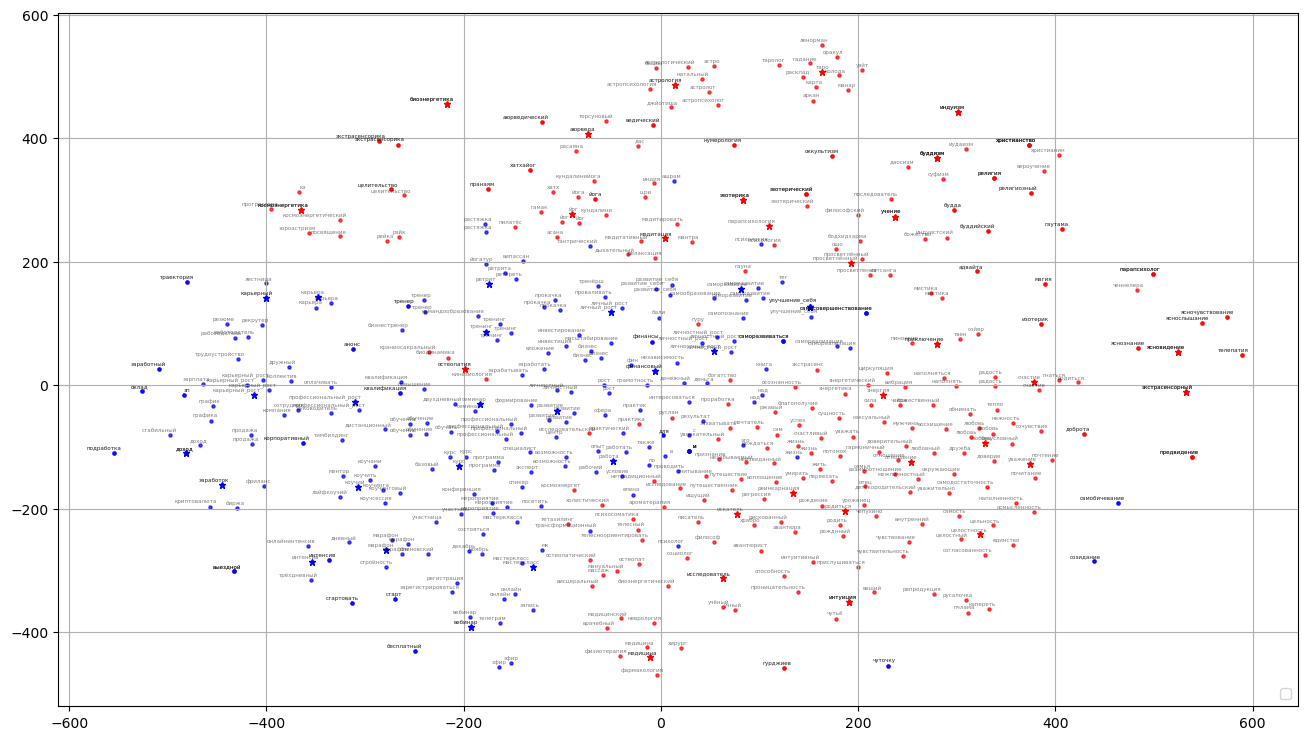

In [23]:
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline

def set_colors(words, list1):
    arr = np.zeros(len(words))
    for i in range(len(arr)):
        if words[i] in list1:
            arr[i] = 1
        else:
            arr[i] = 0
    return arr

def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a=0.7):
    plt.figure(figsize=(16, 9))
   # colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    colors = cm.rainbow(set_colors(keys, list1))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:-1,0]
        y = embeddings[:-1,1]
        if words[-1] in new_age:
            color = 'red'
        else:
            color = 'blue'
        #plt.scatter(x, y, c=color, alpha=a, label=label)
        plt.scatter(x, y, c=color, alpha=a, s= 5)
        plt.plot(embeddings[-1,0], embeddings[-1,1], color = color, marker='*', ls='none', ms=5)
        plt.annotate(words[-1], alpha=0.5, xy=(embeddings[-1,0], embeddings[-1,1]), xytext=(5, 2), 
                         textcoords='offset points', ha='right', va='bottom', size=4)
        #в embeddings добавить последним элементом само слово(label), а после отдельно нарисовать ее тут
        for i, word in enumerate(words[:-1]):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2), 
                         textcoords='offset points', ha='right', va='bottom', size=4)
    plt.legend(loc=4)
    plt.grid(True)
    plt.savefig("data//pic.png", format='png', dpi=500, bbox_inches='tight')
    plt.show()

tsne_plot_similar_words(keys, embeddings_en_2d, word_clusters)